In [0]:
import numpy as np
import pandas as pd
import math

In [85]:
df = pd.read_csv("https://raw.githubusercontent.com/dinhvietcuong1996/Lab-MachineLearningCourse/master/Lab04/lienminh.csv")
df.head()

,killsDiff,minionsKilledDiff,wardPlacedDiff,firstBlood,heralds,dragons,teamWins
0,3,-2,13,blue,none,none,red
1,0,-66,0,red,red,red,red
2,-4,-17,0,red,none,blue,red
3,-1,-34,28,red,blue,none,red
4,0,-15,58,red,none,red,red


In [0]:
killsDiff = df['killsDiff'].values
minionsKilledDiff = df['minionsKilledDiff'].values
wardPlacedDiff = df['wardPlacedDiff'].values
firstBlood = df['firstBlood'].values
heralds = df['heralds'].values
dragons = df['dragons'].values

teamWins = df['teamWins'].values

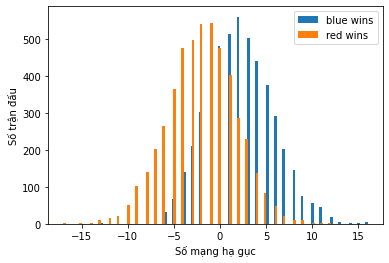

In [87]:
import matplotlib.pyplot as plt
## vẽ histogram (phân phối) của chênh lệch mạng hạ gục khi từng đội thắng
_ = plt.hist(killsDiff[teamWins=='blue'], bins=100, label='blue wins')
_ = plt.hist(killsDiff[teamWins=='red'], bins=100, label='red wins')
plt.xlabel("Số mạng hạ gục")
plt.ylabel("Số trận đấu")
plt.legend()


**firstBlood**

In [88]:
# tính tương quan tuyến tính (correlation coefficient) giữa  việc hạ gục mạng đầu và chiến thắng
np.corrcoef((firstBlood == 'blue').astype(int), (teamWins == 'blue').astype(int))

array([[1.        , 0.20176926],
       [0.20176926, 1.        ]])

In [89]:
df['teamWins'].value_counts()

red     4949
blue    4930
Name: teamWins, dtype: int64

In [90]:
P_blueWins = 4930/df.shape[0]
P_redWins = 4949/df.shape[0]
print(P_blueWins, P_redWins)

0.4990383642069035 0.5009616357930965


In [0]:
is_bluefirstBlood = (firstBlood == 'blue').astype(float)

## tính P(X|B)
P_blueFirstBlood_blueWins  = np.sum(firstBlood[teamWins == 'blue'] == 'blue') / np.sum(teamWins == 'blue')
P_blueFirstBlood_blueWins = P_blueFirstBlood_blueWins * is_bluefirstBlood + (1-P_blueFirstBlood_blueWins)*(1-is_bluefirstBlood)

## tính P(X|R)
P_blueFirstBlood_redWins = np.sum(firstBlood[teamWins == 'red'] == 'blue') / np.sum(teamWins == 'red')
P_blueFirstBlood_redWins = P_blueFirstBlood_redWins * is_bluefirstBlood + (1-P_blueFirstBlood_redWins)*(1-is_bluefirstBlood)

In [0]:
## P(B|X) và P(R|X)
P_blueWins_blueFirstBlood = P_blueFirstBlood_blueWins * P_blueWins / (P_blueFirstBlood_blueWins * P_blueWins + P_blueFirstBlood_redWins * P_redWins)
P_redWins_blueFirstBlood = 1 - P_blueWins_blueFirstBlood

**heralds**

In [93]:
# tính tương quan tuyến tính (correlation coefficient) giữa việc hạ gục heralds và chiến thắng
np.corrcoef(( heralds == 'blue').astype(int), (teamWins == 'blue').astype(int))

array([[1.        , 0.09238472],
       [0.09238472, 1.        ]])

In [0]:
is_blueHeralds = (heralds == 'blue').astype(float)

## tính P(X|B)
P_blueHeralds_blueWins  = np.sum(heralds[teamWins == 'blue'] == 'blue') / np.sum(teamWins == 'blue')
P_blueHeralds_blueWins = P_blueHeralds_blueWins * is_blueHeralds + (1-P_blueHeralds_blueWins)*(1-is_blueHeralds)

## tính P(X|R)
P_blueHeralds_redWins = np.sum(heralds[teamWins == 'red'] == 'blue') / np.sum(teamWins == 'red')
P_blueHeralds_redWins = P_blueHeralds_redWins * is_blueHeralds+ (1-P_blueHeralds_redWins)*(1-is_blueHeralds)

In [0]:
## P(B|X) và P(R|X)
P_blueWins_blueHeralds = P_blueHeralds_blueWins * P_blueWins / (P_blueHeralds_blueWins * P_blueWins + P_blueHeralds_redWins * P_redWins)
P_redWins_blueHeralds = 1 - P_blueWins_blueHeralds

**dragons**

In [96]:
# tính tương quan tuyến tính (correlation coefficient) giữa việc hạ gục dragons và chiến thắng
np.corrcoef(( dragons == 'blue').astype(int), (teamWins == 'blue').astype(int))

array([[1.        , 0.21376769],
       [0.21376769, 1.        ]])

In [0]:
is_blueDragons = (dragons == 'blue').astype(float)

## tính P(X|B)
P_blueDragons_blueWins  = np.sum(dragons[teamWins == 'blue'] == 'blue') / np.sum(teamWins == 'blue')
P_blueDragons_blueWins = P_blueDragons_blueWins * is_blueDragons + (1-P_blueDragons_blueWins)*(1-is_blueDragons)

## tính P(X|R)
P_blueDragons_redWins = np.sum(dragons[teamWins == 'red'] == 'blue') / np.sum(teamWins == 'red')
P_blueDragons_redWins = P_blueDragons_redWins * is_blueDragons+ (1-P_blueDragons_redWins)*(1-is_blueDragons)

In [0]:
## P(B|X) và P(R|X)
P_blueWins_blueDragons= P_blueDragons_blueWins * P_blueWins / (P_blueDragons_blueWins * P_blueWins + P_blueDragons_redWins * P_redWins)
P_redWins_blueDragons = 1 - P_blueWins_blueDragons

**killsDiff**

In [0]:
## tính tham số
killsDiff_mean_blueWins = np.mean(killsDiff[teamWins == 'blue'])
killsDiff_std_blueWins = np.std(killsDiff[teamWins == 'blue'])

killsDiff_mean_redWins = np.mean(killsDiff[teamWins == 'red'])
killsDiff_std_redWins = np.std(killsDiff[teamWins == 'red'])

def normal(x, mean, std):
    return 1/(np.sqrt(2*np.pi)*std)*np.exp(-np.square(x-mean)/(2*np.square(std)))

## P(X|B) và P(X|R)
P_killsDiff_blueWins = normal(killsDiff, killsDiff_mean_blueWins, killsDiff_std_blueWins)
P_killsDiff_redWins = normal(killsDiff, killsDiff_mean_redWins, killsDiff_std_redWins)

In [0]:
## P(B|X) và P(R|X)
P_blueWins_killsDiff = P_killsDiff_blueWins * P_blueWins / (P_killsDiff_blueWins * P_blueWins + P_killsDiff_redWins * P_redWins)
P_redWins_killsDiff = 1 - P_blueWins_killsDiff

**minionsKilledDiff**

In [0]:
## tính tham số
minionsKilledDiff_mean_blueWins = np.mean(minionsKilledDiff[teamWins == 'blue'])
minionsKilledDiff_std_blueWins = np.std(minionsKilledDiff[teamWins == 'blue'])

minionsKilledDiff_mean_redWins = np.mean(minionsKilledDiff[teamWins == 'red'])
minionsKilledDiff_std_redWins = np.std(minionsKilledDiff[teamWins == 'red'])

def normal(x, mean, std):
    return 1/(np.sqrt(2*np.pi)*std)*np.exp(-np.square(x-mean)/(2*np.square(std)))

## P(X|B) và P(X|R)
P_minionsKilledDiff_blueWins = normal(minionsKilledDiff, minionsKilledDiff_mean_blueWins, minionsKilledDiff_std_blueWins)
P_minionsKilledDiff_redWins = normal(minionsKilledDiff, minionsKilledDiff_mean_redWins, minionsKilledDiff_std_redWins)

In [0]:
## P(B|X) và P(R|X)
P_blueWins_minionsKilledDiff = P_minionsKilledDiff_blueWins * P_blueWins / (P_minionsKilledDiff_blueWins * P_blueWins + P_minionsKilledDiff_redWins * P_redWins)
P_redWins_minionsKilledDiff = 1 - P_blueWins_minionsKilledDiff

**wardPlacedDiff**

In [0]:
## tính tham số
wardPlacedDiff_mean_blueWins = np.mean(wardPlacedDiff[teamWins == 'blue'])
wardPlacedDiff_std_blueWins = np.std(wardPlacedDiff[teamWins == 'blue'])

wardPlacedDifff_mean_redWins = np.mean(wardPlacedDiff[teamWins == 'red'])
wardPlacedDiff_std_redWins = np.std(wardPlacedDiff[teamWins == 'red'])

def normal(x, mean, std):
    return 1/(np.sqrt(2*np.pi)*std)*np.exp(-np.square(x-mean)/(2*np.square(std)))

## P(X|B) và P(X|R)
P_wardPlacedDiff_blueWins = normal(wardPlacedDiff, wardPlacedDiff_mean_blueWins, wardPlacedDiff_std_blueWins)
P_wardPlacedDiff_redWins = normal(wardPlacedDiff, wardPlacedDifff_mean_redWins, wardPlacedDiff_std_redWins)

In [0]:
## P(B|X) và P(R|X)
P_blueWins_wardPlacedDiff = P_wardPlacedDiff_blueWins * P_blueWins / (P_wardPlacedDiff_blueWins * P_blueWins + P_wardPlacedDiff_redWins * P_redWins)
P_redWins_wardPlacedDiff = 1 - P_blueWins_wardPlacedDiff

***PREDICT***

In [0]:
teamWins_pred = []
for i in range(df.shape[0]):
  P_blueWins_pred = math.log(P_blueWins) + math.log(P_blueWins_blueFirstBlood[i]) + math.log(P_blueWins_blueHeralds[i]) + math.log(P_blueWins_blueDragons[i]) + math.log(P_blueWins_killsDiff[i]) + math.log(P_blueWins_minionsKilledDiff[i]) + math.log(P_blueWins_wardPlacedDiff[i])
  P_redWins_pred = math.log(P_redWins) + math.log(P_redWins_blueFirstBlood[i]) + math.log(P_redWins_blueHeralds[i]) + math.log(P_redWins_blueDragons[i]) + math.log(P_redWins_killsDiff[i]) + math.log(P_redWins_minionsKilledDiff[i]) + math.log(P_redWins_wardPlacedDiff[i])
  if(P_blueWins_pred >= P_redWins_pred):
    teamWins_pred.append('blue')
  else:
    teamWins_pred.append('red')

In [0]:
teamWins_pred = np.asarray(teamWins_pred)

In [110]:
accuracy = np.mean(teamWins_pred == teamWins)
accuracy

0.709484765664541